In [1]:
#importer les librairies pours utiliser un CNN
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
#importer les données de training et test
trainData = pd.read_csv('Data/train.csv')
trainLabels = pd.read_csv('Data/train_result.csv')
testData = pd.read_csv('Data/test.csv')

In [3]:
#Mettre les points en bas de 0 à 0 et enlver les NaN
trainData[trainData < 0] = 0
trainData = trainData.dropna(axis=1)

testData[testData < 0] = 0
testData = testData[trainData.columns]

In [14]:
#Reformer les donnees pour avoir une matrice de 4d pour que l'entree dans le CNN soit en 3d
newTrainData = np.array(trainData).reshape(50000,28,56,1)

12

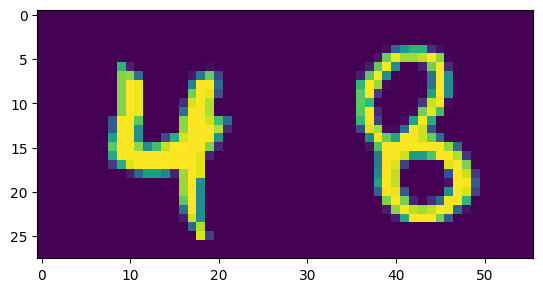

In [15]:
#Visualiser
import matplotlib.pyplot as plt
plt.imshow(newTrainData[5])
trainLabels.iloc[5,1]

In [16]:
#Créer les données de training et validation
trainX,validX,trainY,validY = train_test_split(newTrainData,trainLabels,test_size = 0.2, random_state = 1)

In [17]:
#Transformer les labels en one hot vector
labels = trainLabels.iloc[:,1].unique().size
trainYOH = keras.utils.to_categorical(trainY['Class'], labels)
validYOH = keras.utils.to_categorical(validY['Class'], labels)

In [16]:
#Variable pour les hyperparametre de la constructions du modele
filter1 = 32
filter2 = 64
kernel_size = (3,3)
activation1 = 'relu'
activation2 = 'softmax'
pool_size = (9,9)
droupout1=0.25
droupout2=0.5
units = 128

In [17]:
#Batir le CNN
model = Sequential()
model.add(Conv2D(filter1, kernel_size,activation=activation1,input_shape=(28,56,1)))
model.add(Conv2D(filter2, kernel_size, activation=activation1))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(droupout1))
model.add(Flatten())
model.add(Dense(units, activation=activation1))
model.add(Dropout(droupout2))
model.add(Dense(labels, activation=activation2))

In [18]:
#Hyperparametre d'entrainement
batchSize = 128
epochs = 10

In [19]:
#Entrainer le model et voir sa precision sur le validation set
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.fit(trainX, trainYOH,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(validX, validYOH))
#score = model.evaluate(validX, validYOH, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/10
313/313 [==============================] - 99s 314ms/step - loss: 2.9368 - accuracy: 0.0619 - val_loss: 2.9171 - val_accuracy: 0.0791
Epoch 2/10
 85/313 [=======>......................] - ETA: 1:09 - loss: 2.9169 - accuracy: 0.0809

KeyboardInterrupt: 